In [5]:
# step 1 : collect tweet data

from twitterscraper import query_tweets

dataset= list()
tweets = dict()
sent= list() # this list is used for step 4: sentiment analysis
for x in query_tweets(input('please add your searching terms:'),int(input('input the number of tweets you want to collect:'))):
    # If you want to use advanced search in Twitter, please copy and paste link between first and last '&' 
    # For example, you do advanced search in Twitter, and your search term is: Paul George Trade after 2017-06-30
    # The link you got is : https://twitter.com/search?l=&q=Paul%20George%20AND%20trade&src=typd
    # And the keyword should be : Paul%20George%20AND%20trade%20since%3A2017-06-30
    tweets['user']= x.user
    tweets['id']= x.id
    tweets['timestamp']=x.timestamp
    tweets['fullname']=x.fullname
    tweets['text']=x.text
    dataset.append(tweets.copy()) 
    sent.append(x.text)
#print(sent)
print(dataset)



 

please add your searching terms:god
input the number of tweets you want to collect:20
[{'user': 'john_pruette', 'id': '901226527387525121', 'timestamp': datetime.datetime(2017, 8, 25, 23, 35, 22), 'fullname': 'John pruette', 'text': 'God is trying to help! '}, {'user': 'Dolly0811', 'id': '901226528104697857', 'timestamp': datetime.datetime(2017, 8, 25, 23, 35, 22), 'fullname': 'Anna B. Patriot', 'text': '@josephllengyel TY for following Patriot, Thank You for your service!! God Bless You &  Your Family!!  #MAGA '}, {'user': 'Kathleeyyn', 'id': '901226528859500546', 'timestamp': datetime.datetime(2017, 8, 25, 23, 35, 23), 'fullname': '\xa0☺', 'text': 'Belated happy birthday @joycutura God bless'}, {'user': 'FOX59', 'id': '901226529451122688', 'timestamp': datetime.datetime(2017, 8, 25, 23, 35, 23), 'fullname': 'FOX59 News', 'text': 'McCordsville teacher’s letter asking students to stop talking about God raises concerns http://via.fox59.com/VZzSW\xa0'}, {'user': 'tluis5317', 'id': '90122

In [3]:
# step 2: Count Term Frequencies

context= list()
for tweet in dataset:
    x=tweet['text'].split(' ')
    #print(x)
    context.append(x.copy())
#print(context)

total= dict()
for tweet in context:
    for word in tweet:
        total[word]= total.get(word,0)+1
#print(total)
    
# import common stop word list
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
import string
  
punctuation = list(string.punctuation)   
stop = stopwords.words('english') + punctuation + ['']
#print(stop)
 
for x in stop:
    if x in total.keys():
        total.pop(x)
#print(total)            

#save it as dataset:
import pandas
df= pandas.DataFrame(list(total.items()))
df.rename(columns={0: 'word', 1: 'frequency'}, inplace=True)
df=df.sort_values(by='frequency',ascending=False)
#show first 40 words
df= df.head(40)
df

,word,frequency
1988,Paul,487
2343,trade,422
1863,George,403
920,Kyrie,72
1478,I,69
996,Pacers,58
1280,The,55
1231,back,48
414,failed,44
1071,get,42


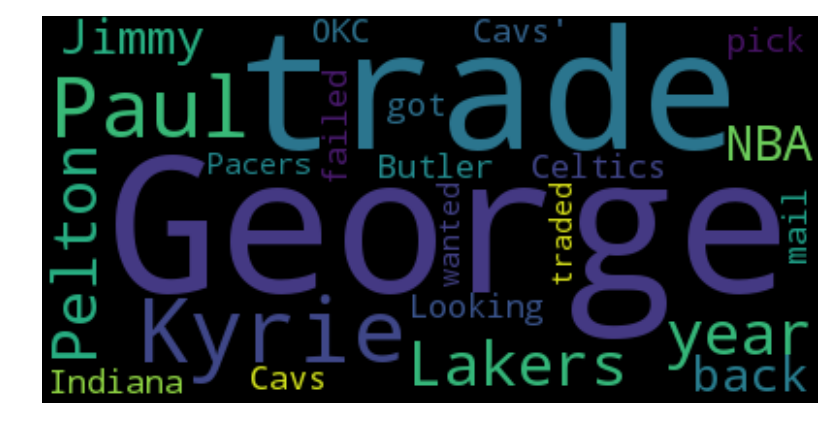

In [4]:
#step 3: generate word cloud 
from os import path
from wordcloud import WordCloud

wordcloud2 = WordCloud().generate(' '.join(df['word']))

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

plt.imshow(wordcloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

In [6]:
#step 4: sentiment analysis

tweet_list= pandas.DataFrame(sent)  # sent is the list of tweet text we got in step 1
tweet_list.rename(columns={0: 'text'}, inplace=True)



import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names


positive_vocab = list()
for line in open("positive-words(1).txt"):
    line = line.strip()
    if not line.startswith(';'):
        positive_vocab.append(line)
positive_vocab.remove('')
#print(positive_vocab)

negative_vocab = list()
for line in open("negative-words.txt"):
    line = line.strip()
    if not line.startswith(';'):
        negative_vocab.append(line)
negative_vocab.remove('')
#print(negative_vocab)        



def word_feats(words):
    return dict([(word, True) for word in words])

positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]

train_set = negative_features + positive_features 
classifier = NaiveBayesClassifier.train(train_set)

# Predict
prediction = list()
for x in tweet_list['text']:  
    neg = 0
    pos = 0
    sentence = x
    sentence = sentence.lower()
    word_List = sentence.split(' ')
    for word in word_List:
        classResult = classifier.classify( word_feats(word))
        if classResult == 'neg':
            neg = neg + 1
        if classResult == 'pos':
            pos = pos + 1
    pos_possibility = float(pos)/len(word_List)
    neg_possibility = float(neg)/len(word_List)
    if pos_possibility > 0.5:
        prediction.append('postive')
    elif neg_possibility > 0.5:
        prediction.append('negative')
    else:
        prediction.append('neutral')
#print(prediction)
 
    
tweet_list['prediction'] = prediction
#print(tweet_list)

pos = 0
neg = 0
for y in tweet_list['prediction']:
    if y == 'postive':
        pos = pos + 1
    if y == 'negative':
        neg = neg + 1
positive_overall = float(pos)/len(tweet_list) * 100
negative_overall = float(neg)/len(tweet_list) * 100
print('Overall positve tweets are',positive_overall,'%')
print('Overall neutral tweets are',100-positive_overall-negative_overall,'%')
print('Overall negative tweets are',negative_overall,'%')

Overall positve tweets are 0.0 %
Overall neutral tweets are 0.0 %
Overall negative tweets are 100.0 %
